## Marketing and Retail Analytics - Capstone project By Dipesh Sanas

### Problem Statement

####  OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

#### Steps performed
 
#### 1. Data exploration and cleaning: Identify missing and duplicate values in each column and treat them  accordingly. Also, treat any and all data quality issues associated with the dataset.    
#### 2. Data visualisation: Create appropriate visualisations to identify the most ordered products by quantity and revenue.
#### 3. Market basket analysis: Identify combinations of product categories that are ordered frequently and visualise them as required. Using Apriori, dentified the combinations of product categories that are ordered frequently.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading all excel sheets from Retail dataset
### 1) Orders

In [2]:
orders = pd.read_excel("D:\capstone project\Retail_dataset.xlsx", sheet_name="orders")
orders.shape

(99441, 7)

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [4]:
# Are "order_id" unique?
orders.order_id.duplicated().sum()

0

In [5]:
# Are "Customer_id" unique?
orders.customer_id.duplicated().sum()

3345

In [6]:
#Checking different order statuses
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
#Checking the differet 'order_status' and their counts.
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
#checking for the percentage data frequency
orders.order_status.value_counts(normalize=True)*100

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

## We are only interested in delivered order status for further analysis.

In [9]:
#Checking the total number of 'delivered' orders
(orders.order_status=="delivered").sum()

96478

In [10]:
#Restricting the orders dataframe with order_status as 'delivered'
orders=orders[orders.order_status=="delivered"]
orders.shape

(96478, 7)

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [12]:
#Checking the the order_status values again

orders.order_status.unique()

array(['delivered'], dtype=object)

In [13]:
#Checking missing values.

orders.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [14]:
#Imputing values for order_approved_at with order_purchase_timestamp

orders.order_approved_at.fillna(orders.order_purchase_timestamp,inplace=True)

#Imputing values for order_delivered_timestamp with order_estimated_delivery_date

orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace=True)

In [15]:
#Checking again if any missing values are left.

orders.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

### 2) order_items

In [16]:
order_items = pd.read_excel("D:\capstone project\Retail_dataset.xlsx", sheet_name="order_items")
order_items.shape

(112650, 6)

In [17]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [18]:
#Checking missing values.

order_items.isnull().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

### 3) Customers

In [19]:
customers = pd.read_excel("D:\capstone project\Retail_dataset.xlsx", sheet_name="customers")
customers.shape

(99441, 4)

In [20]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
#Checking missing values.

customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [22]:
#Checking for duplicate customer values

customers.customer_id.duplicated().sum()

3345

In [23]:
#Dropping the duplicates and keeping the first occurence
customers.drop_duplicates(subset="customer_id" , keep="first" , inplace=True)

In [24]:
#Checking the shape after dropping duplicates. It is less now 99441 - 3345 = 96096

customers.shape

(96096, 4)

In [25]:
#Validating if any duplicates left

customers.customer_id.duplicated().sum()

0

### 4) Payments

In [26]:
# Reading the Payments sheet
payments = pd.read_excel("D:\capstone project\Retail_dataset.xlsx", sheet_name="payments")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
payments.shape

(103886, 5)

In [28]:
#Checking the most used 'payment_type' and their counts.
payments.payment_type.value_counts()

credit_card    76795
wallet         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [29]:
#Checking the payments 'not defined' affected rows
payments[payments.payment_type=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [30]:
#Since there are only 3 recors affected, we can drop these records.

i=payments[payments['payment_type']=='not_defined'].index
payments.drop(i, axis=0, inplace=True)

In [31]:
# Validating if payment type 'not_defined' is dropped

payments.payment_type.unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

In [32]:
#Checking missing values.

payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 5) Products

In [33]:
# Reading the Products sheet

products = pd.read_excel("D:\capstone project\Retail_dataset.xlsx", sheet_name="products")
products.shape

(32951, 6)

In [34]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [35]:
#Checking missing values.

products.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [36]:
#Checking the value count of "product_category_name"
products.product_category_name.value_counts()

toys                                 24725
bed_bath_table                         789
sports_leisure                         721
furniture_decor                        687
health_beauty                          648
                                     ...  
home_comfort_2                           1
diapers_and_hygiene                      1
furniture_mattress_and_upholstery        1
fashion_childrens_clothes                1
security_and_services                    1
Name: product_category_name, Length: 70, dtype: int64

In [37]:
products.product_category_name.value_counts(normalize=True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
home_comfort_2                        0.003051
diapers_and_hygiene                   0.003051
furniture_mattress_and_upholstery     0.003051
fashion_childrens_clothes             0.003051
security_and_services                 0.003051
Name: product_category_name, Length: 70, dtype: float64

In [38]:
#Checking the mode of "product_category_name" for imputing 

products["product_category_name"].mode()[0]

'toys'

In [39]:
#Imputing the product_category_name NULL values

products["product_category_name"].fillna(products["product_category_name"].mode()[0], inplace=True)

In [40]:
#Checking missing values again for remaing columns.

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [41]:
#Checking missing values again for remaing columns.

products.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [42]:
#Checking the description of Numerical columns to gain insights on the NULL values of remaining columns
products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [43]:
num_cols = products.describe().columns.to_list()
num_cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

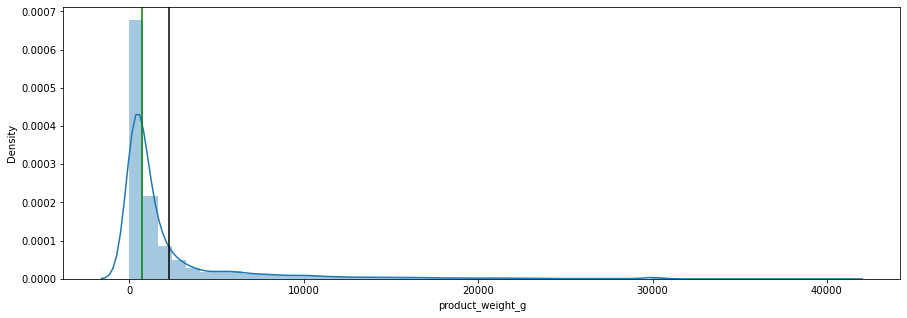

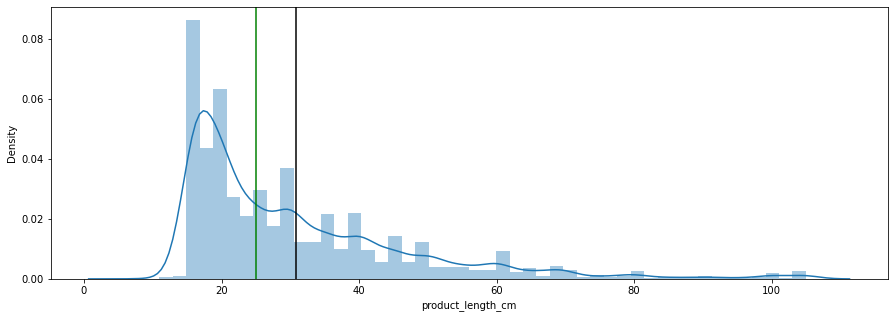

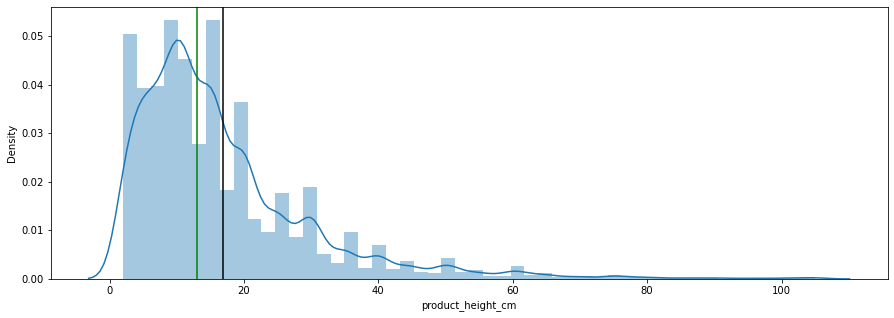

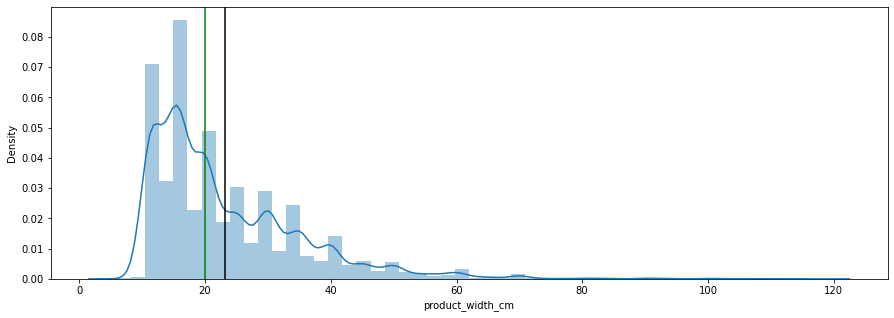

In [44]:
#Visualizing the product_weight_g,product_length_cm,product_height_cm,product_width_cm for data skewness

for i in num_cols:
    plt.figure(figsize=(15,5))
    sns.distplot(products[i])
    plt.axvline(products[i].mean(), color="black")
    plt.axvline(products[i].median(), color="green")
    plt.show()
    print("="*90)

In [45]:
#Imputing the missing values with appropriate method. Since all of them having right skewed distribution, therefore Median.

products.product_weight_g.fillna(products.product_weight_g.median(), inplace=True)
products.product_length_cm.fillna(products.product_length_cm.median(), inplace=True)
products.product_height_cm.fillna(products.product_height_cm.median(), inplace=True)
products.product_width_cm.fillna(products.product_width_cm.median(), inplace=True)

In [46]:
#Validating missing values after imputing.

products.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

## All the sheets are cleaned and prepared, therefore Exporting cleaned dataset to an excel

In [47]:
writer = pd.ExcelWriter("D:\capstone project\Cleaned_Retail_dataset.xlsx", engine='xlsxwriter')

In [48]:
# Write each dataframe to a different worksheet.
orders.to_excel(writer, sheet_name='orders')
order_items.to_excel(writer, sheet_name='order_items')
customers.to_excel(writer, sheet_name='customers')
products.to_excel(writer, sheet_name='products')
payments.to_excel(writer, sheet_name='payments')

In [49]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()

## Now we are going to merge the dataframes to create a new dataframe named Delivered_orders which will be further used for Market basket analysis using Apriori algorithm

In [50]:
#Creating a new dataframe 'Delivered_orders' by merging all the others sheets
#Merging 'orders' with 'order_items'

Delivered_orders = pd.merge(orders,order_items,how='inner',on='order_id')

In [51]:
Delivered_orders.shape

(110197, 12)

In [52]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [53]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
dtype: int64

In [54]:
#Merging 'Delivered_orders' with 'Products_sheet'

Delivered_orders = pd.merge(Delivered_orders,products,how='inner',on='product_id')

In [55]:
Delivered_orders.shape

(110197, 17)

In [56]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,e781fdcc107d13d865fc7698711cc572,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0


In [57]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [58]:
#Merging 'orders_delivered' with 'payments'

Delivered_orders = pd.merge(Delivered_orders,payments,how='inner',on='order_id')

In [59]:
Delivered_orders.shape

(115035, 21)

In [60]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [61]:
#Merging 'orders_delivered' with 'customers'

Delivered_orders = pd.merge(Delivered_orders,customers,how='inner',on='customer_id')

In [62]:
Delivered_orders.shape

(115035, 24)

In [63]:
Delivered_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [64]:
Delivered_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'shipping_charges', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [66]:
# The final 'Delivered_orders' dataframe

Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


### Market Basket Analysis Using Asociation Rules and Aprior Algorithm

In [68]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [69]:
#Creating a new dataframe with only the required columns for analysis

Market_Basket_set = Delivered_orders[['order_id','product_category_name', 'order_item_id']]

In [70]:
Market_Basket_set.shape

(115035, 3)

In [71]:
#Checking the duplicates after updating

Market_Basket_set.duplicated().sum()

4841

In [72]:
#Dropping the duplicates keeping the first occurence

Market_Basket_set.drop_duplicates(keep='first', inplace=True)

In [73]:
Market_Basket_set.shape

(110194, 3)

In [74]:
Market_Basket_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110194 entries, 0 to 115034
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               110194 non-null  object
 1   product_category_name  110194 non-null  object
 2   order_item_id          110194 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [75]:
#Again Creating a new dataframe using pandas pivot, this is required for basket analysis

Basket_Data = pd.pivot_table(data=Market_Basket_set,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [76]:
Basket_Data.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [77]:
Basket_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96477 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   agro_industry_and_commerce               96477 non-null  float64
 1   air_conditioning                         96477 non-null  float64
 2   art                                      96477 non-null  int64  
 3   arts_and_craftmanship                    96477 non-null  int64  
 4   audio                                    96477 non-null  float64
 5   auto                                     96477 non-null  float64
 6   baby                                     96477 non-null  float64
 7   bed_bath_table                           96477 non-null  float64
 8   books_general_interest                   96477 non-null  float64
 9   books_imported                           96477 non-null  float6

In [78]:
#For basket analysis converting/encoding the data to 1s and 0s 
def data(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
Basket_Data_encode = Basket_Data.applymap(data)

In [79]:
#As reuired by the assignment, dropping the Product_cataegories (columns) whose sum value (total_sale) 
#is less than equal to 5


for column in Basket_Data_encode.columns:
    if (Basket_Data_encode[column].sum(axis=0, skipna=True)<=5):
        Basket_Data_encode.drop(column, inplace=True, axis=1)

In [80]:
Basket_Data_encode.shape

(96477, 61)

####  Identify the combinations of product categories which are frequently ordered together

In [81]:
Basket_Data_encode =Basket_Data_encode[(Basket_Data_encode>0).sum(axis=1)>=2]
Basket_Data_encode.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Generating frequently bought items
#### First step in generation of association rules is to get all the frequent itemsets.Frequent itemsets are the ones which occur at least a minimum number of times in the transactions.

In [82]:
# Now, we need to call apriori for creating frequently bought item with support = 3%(0.03)
#Support - This measure gives an idea of how frequent `ItemSet` is in all the transactions.

my_frequent_items = apriori(Basket_Data_encode, min_support=0.03, use_colnames=True)
my_frequent_items

,support,itemsets
0,0.031201,(auto)
1,0.230889,(bed_bath_table)
2,0.084243,(computers_accessories)
3,0.032761,(fashion_bags_accessories)
4,0.127145,(furniture_decor)
5,0.042122,(garden_tools)
6,0.066303,(health_beauty)
7,0.053822,(housewares)
8,0.055382,(sports_leisure)
9,0.971139,(toys)


### Create Association Rules from the frequent itemsets, identifying rules such as Confidence and Lift

In [83]:
#We would apply association rules on frequent itemset to find product combinations. 
#Confidence - This measure defines the likeliness of occurrence of consequent on the cart given that the cart 
#already has the antecedents

rulesconfidence = association_rules(my_frequent_items, metric="confidence", min_threshold=0.1)
rulesconfidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
2,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
5,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437
6,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151
7,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167
8,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300
9,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903


In [84]:
#Lift - This measure defines the likeliness of occurrence of consequent on the cart given that the cart already 
#has the antecedent, but controlling the popularity of consequent.
#Here we are setting based on lift and keeping minimum lift as >1.

ruleslift=rulesconfidence[(rulesconfidence['lift'] > 1)]
ruleslift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
2,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
11,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293


### Extracting the markest basket data to create dashboard using Tableau.

In [85]:
#Extracting the additional markest basket metrics data to be visualized
#Taking care of the frozenset before exporting

my_frequent_items["itemsets"] = my_frequent_items["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")

rulesconfidence["antecedents"] = rulesconfidence["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

rulesconfidence["consequents"] = rulesconfidence["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

ruleslift["antecedents"] = ruleslift["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

ruleslift["consequents"] = ruleslift["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

In [86]:
with pd.ExcelWriter(r"D:\capstone project\Market_basket_Dataset.xlsx") as excel_sheets:    
    my_frequent_items.to_excel(excel_sheets, sheet_name="support", index=False)
    rulesconfidence.to_excel(excel_sheets, sheet_name="confidence", index=False)
    ruleslift.to_excel(excel_sheets, sheet_name="lift", index=False)